### Metro Interstate traffic Prediction

For a given time, we need to suggest the amount of traffic volume of that particular hour given its different features like type of weather, amount of rain, snow etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading the data
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
df.head(10) #printing the first ten records

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   
5    None  291.72      0.0      0.0           1        Clear   
6    None  293.17      0.0      0.0           1        Clear   
7    None  293.86      0.0      0.0           1        Clear   
8    None  294.14      0.0      0.0          20       Clouds   
9    None  293.10      0.0      0.0          20       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
5        sky is clear  2012-10-02 14:00:00            5181  
6        sky is clear  2012-10-02 15:00:00            5584  
7        sky is clear  2012-10-02 16:00:00            6015  
8          few clouds  2012-10-02 17:00:00            5791  
9          few clouds  2012-10-02 18:00:00            4770

In [3]:
#list of columns in the dataset
list(df.columns)

['holiday',
 'temp',
 'rain_1h',
 'snow_1h',
 'clouds_all',
 'weather_main',
 'weather_description',
 'date_time',
 'traffic_volume']

From the above list of columns **traffic_volume** is the label column (y- value)

In [5]:
df.tail() #last 5 records of the dataset

holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0          90  Thunderstorm   
48202    None  282.09      0.0      0.0          90        Clouds   
48203    None  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
48199           broken clouds  2018-09-30 19:00:00            3543  
48200         overcast clouds  2018-09-30 20:00:00            2781  
48201  proximity thunderstorm  2018-09-30 21:00:00            2159  
48202         overcast clouds  2018-09-30 22:00:00            1450  
48203         overcast clouds  2018-09-30 23:00:00             954

Description: this dataset contains hourly traffic volume from 2nd Oct,2012 till 30th Sept,2018.

In [6]:
#label column = traffic_volume
df.shape

(48204, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
holiday                48204 non-null object
temp                   48204 non-null float64
rain_1h                48204 non-null float64
snow_1h                48204 non-null float64
clouds_all             48204 non-null int64
weather_main           48204 non-null object
weather_description    48204 non-null object
date_time              48204 non-null object
traffic_volume         48204 non-null int64
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [8]:
df.describe()

temp       rain_1h       snow_1h    clouds_all  traffic_volume
count  48204.000000  48204.000000  48204.000000  48204.000000    48204.000000
mean     281.205870      0.334264      0.000222     49.362231     3259.818355
std       13.338232     44.789133      0.008168     39.015750     1986.860670
min        0.000000      0.000000      0.000000      0.000000        0.000000
25%      272.160000      0.000000      0.000000      1.000000     1193.000000
50%      282.450000      0.000000      0.000000     64.000000     3380.000000
75%      291.806000      0.000000      0.000000     90.000000     4933.000000
max      310.070000   9831.300000      0.510000    100.000000     7280.000000

###### Checking for the total number of Null/NA values present in the dataset

In [9]:
df.isna().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

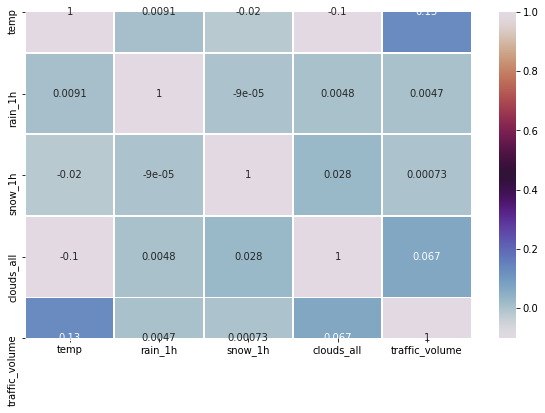

In [10]:
#Next we should find for any correlation among the columns

corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,linewidths=0.8,cmap='twilight')


From the co-relation plot or heatmap it's clear none of the columns have multi-colinearity among themeselves

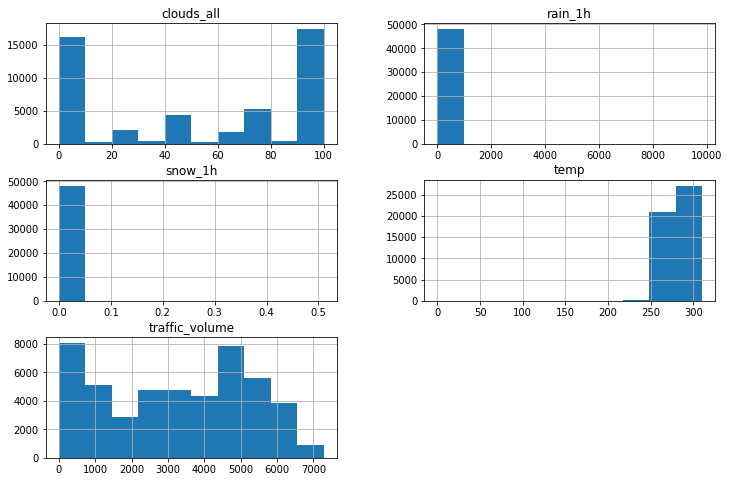

In [11]:
# checking the distribution among numerical columns

df.hist(figsize=(12,8))
plt.show()


In [12]:
#listing the numerical colums
numerical_columns = df.select_dtypes(include=['int64','float64']).columns

In [13]:
numerical_columns

Index(['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume'], dtype='object')

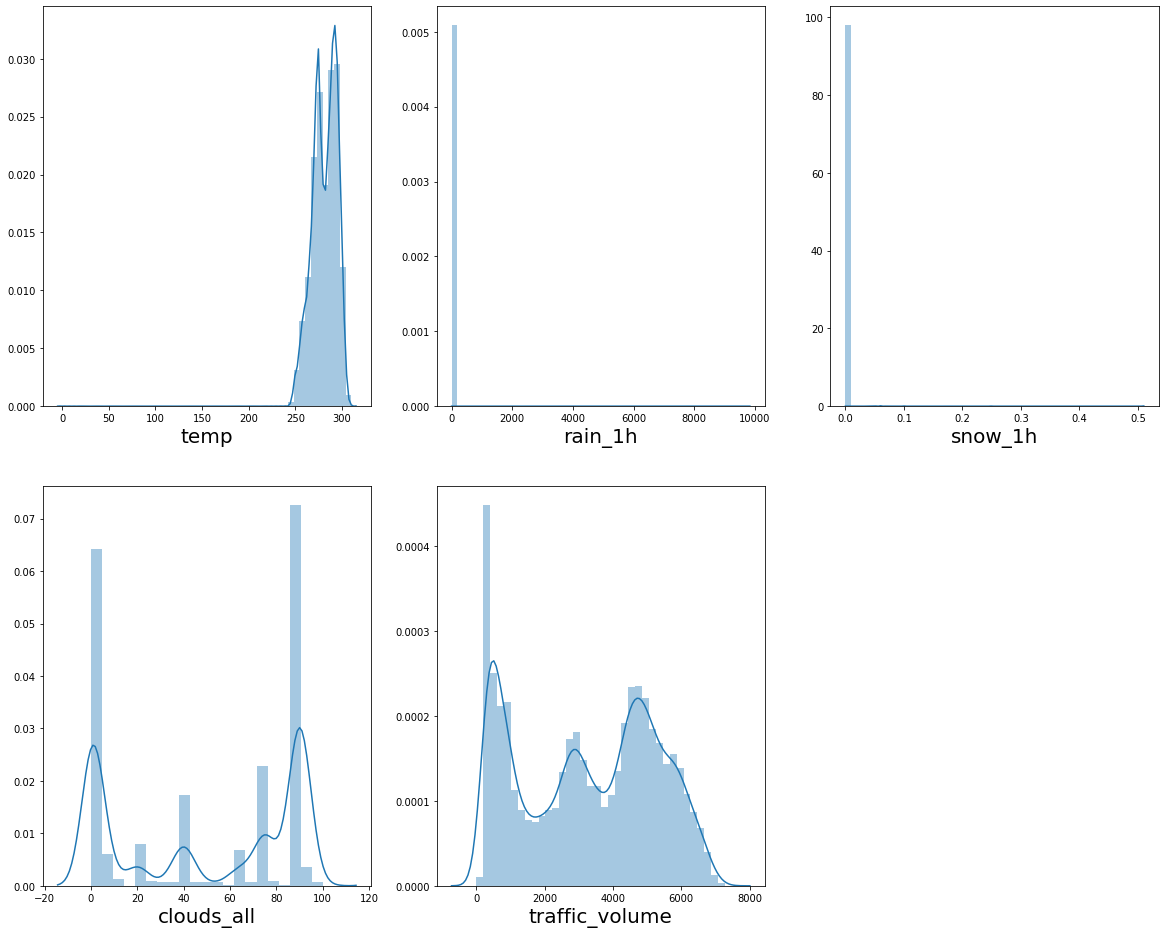

In [14]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_columns:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The above graph showing the overall distribution of the numerical columns.

Observations from the above two plots:

    a)	The ‘temp’ column maximum of its values in between 260 to 300. Probably the temperature being shown here is in ‘Kelvin scale’(273K = 0 C)
    b)	‘rain_1h’ – the given data shows that these particular place doesn’t have too much of rains. It is mostly ‘No-rain’ or a clear or little rainy weather is being observed in this time-period.
    c)	‘snow_1h’ is also same as rain, in the given time period there was not likely very freezzy weather, since it’s very little amount of snow per day is recorded, mostly no-snowfall.
    d)	‘clouds-all’ values in this column ranges between 0 to 100, mostly lot of values are there around 0-25 range and in 70-100 range, this is basically denoting that the weather of this particular place is mostly either Clear sky or Cloudy, further we will see it in the ‘weather_main’ column which denotes the exact weather condition of the place.
    e)	‘traffic volume’ column is distributed mostly within the value range of 200 to 6000, though there are a few high & low values that this range is also available, we will perform Boxplot on this to confirm whether there is outlier in it or not.



### Outlier detection

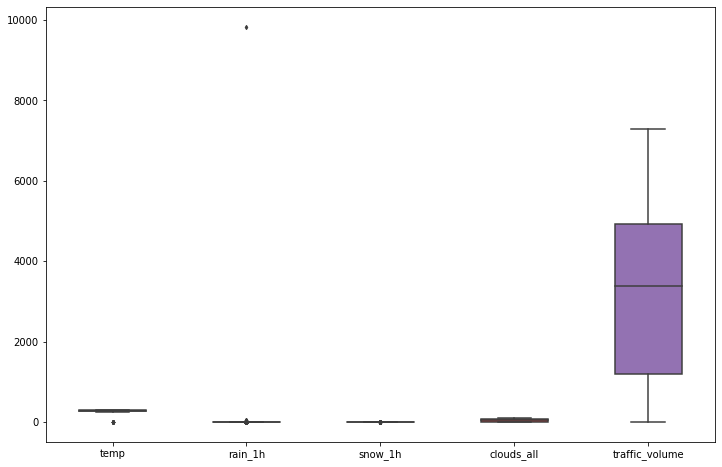

In [15]:
#Boxplot
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

From the above boxplot we can conclude there are very minimal outliers in the dataset.

Now we will use pairplot to find outliers in detail.

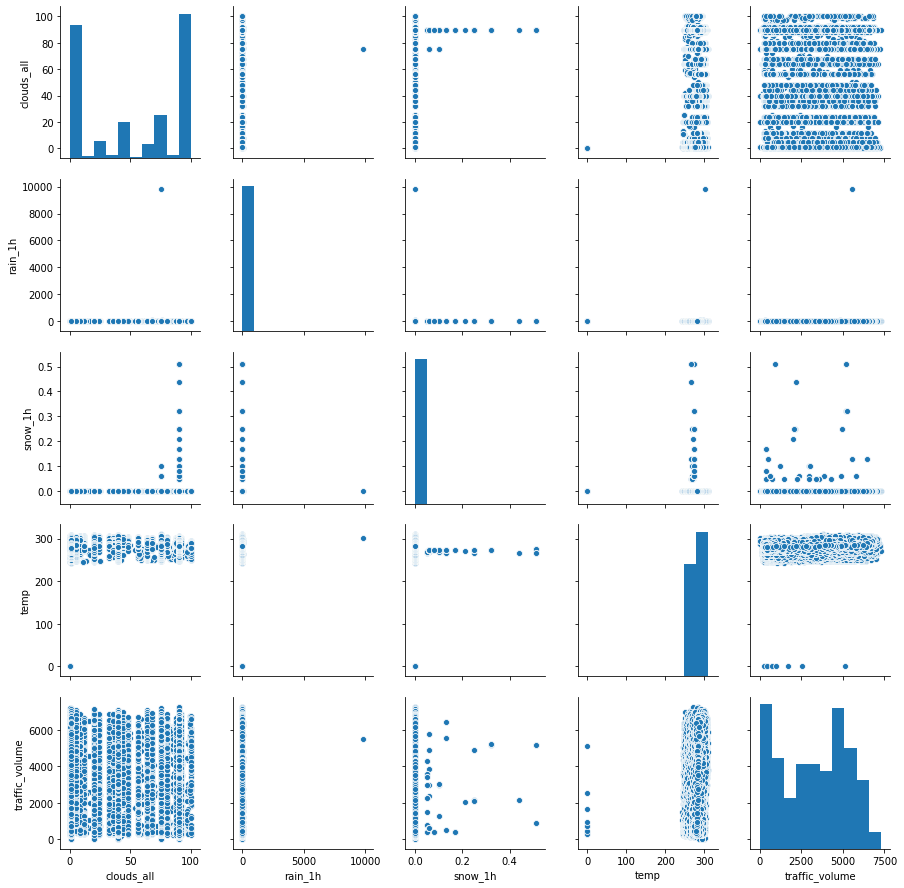

In [16]:
cols =['clouds_all','rain_1h','snow_1h','temp','traffic_volume'] #numerical columns
sns.pairplot(df[cols])
plt.show()

From the boxplot ,the dataset describtion and also from the pairplot we can find 'rain_1h' has some high values which might be an outlier in the dataset. We will find out more on that.

In [17]:
df[df['rain_1h']==df['rain_1h'].max()]

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
24872    None  302.11   9831.3      0.0          75         Rain   

      weather_description            date_time  traffic_volume  
24872     very heavy rain  2016-07-11 17:00:00            5535

Since it is having only one value it is difficult to conclude whether it's outlier or not. So, we have to compare with the weather_description as 'very heavy rain' and clouds_all greater than maybe 50.

In [18]:
df[(df['weather_description']== 'very heavy rain') & (df['clouds_all']>50)]

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
7133     None  291.76    16.38      0.0          76         Rain   
7179     None  295.82    44.45      0.0          76         Rain   
7670     None  292.87    21.42      0.0          90         Rain   
8247     None  289.10    55.63      0.0          68         Rain   
10734    None  262.65    18.80      0.0          64         Rain   
10806    None  264.50    28.70      0.0          64         Rain   
16300    None  294.87    23.80      0.0          90         Rain   
16504    None  292.02    27.57      0.0          90         Rain   
16923    None  295.12    20.24      0.0          90         Rain   
17437    None  294.49    25.46      0.0          90         Rain   
24872    None  302.11  9831.30      0.0          75         Rain   
25639    None  292.70    18.42      0.0          80         Rain   

      weather_description            date_time  traffic_volume  
7133      very heavy rain  2013-06-22 05:00:00             635  
7179      very heavy rain  2013-06-24 11:00:00            4802  
7670      very heavy rain  2013-07-14 07:00:00            1745  
8247      very heavy rain  2013-08-07 02:00:00             315  
10734     very heavy rain  2013-12-16 19:00:00            2755  
10806     very heavy rain  2013-12-19 23:00:00            1190  
16300     very heavy rain  2015-07-06 03:00:00             346  
16504     very heavy rain  2015-07-13 00:00:00             492  
16923     very heavy rain  2015-07-28 07:00:00            4302  
17437     very heavy rain  2015-08-16 21:00:00            2118  
24872     very heavy rain  2016-07-11 17:00:00            5535  
25639     very heavy rain  2016-08-10 21:00:00            1904

very less number of data here, we would move to check only with weather description  as 'very heavy rain'.

In [19]:
df[df['weather_description']== 'very heavy rain']

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
7133     None  291.76    16.38      0.0          76         Rain   
7179     None  295.82    44.45      0.0          76         Rain   
7664     None  292.82    19.90      0.0          20         Rain   
7667     None  292.65    25.32      0.0           8         Rain   
7670     None  292.87    21.42      0.0          90         Rain   
8247     None  289.10    55.63      0.0          68         Rain   
10734    None  262.65    18.80      0.0          64         Rain   
10806    None  264.50    28.70      0.0          64         Rain   
14853    None  298.21    18.03      0.0           0         Rain   
16300    None  294.87    23.80      0.0          90         Rain   
16504    None  292.02    27.57      0.0          90         Rain   
16923    None  295.12    20.24      0.0          90         Rain   
17437    None  294.49    25.46      0.0          90         Rain   
24872    None  302.11  9831.30      0.0          75         Rain   
25481    None  294.92    16.51      0.0          32         Rain   
25639    None  292.70    18.42      0.0          80         Rain   
25779    None  297.71    31.75      0.0           0         Rain   
25961    None  294.07    20.07      0.0          40         Rain   

      weather_description            date_time  traffic_volume  
7133      very heavy rain  2013-06-22 05:00:00             635  
7179      very heavy rain  2013-06-24 11:00:00            4802  
7664      very heavy rain  2013-07-14 05:00:00             542  
7667      very heavy rain  2013-07-14 06:00:00             958  
7670      very heavy rain  2013-07-14 07:00:00            1745  
8247      very heavy rain  2013-08-07 02:00:00             315  
10734     very heavy rain  2013-12-16 19:00:00            2755  
10806     very heavy rain  2013-12-19 23:00:00            1190  
14853     very heavy rain  2014-06-02 16:00:00            6443  
16300     very heavy rain  2015-07-06 03:00:00             346  
16504     very heavy rain  2015-07-13 00:00:00             492  
16923     very heavy rain  2015-07-28 07:00:00            4302  
17437     very heavy rain  2015-08-16 21:00:00            2118  
24872     very heavy rain  2016-07-11 17:00:00            5535  
25481     very heavy rain  2016-08-04 07:00:00            5724  
25639     very heavy rain  2016-08-10 21:00:00            1904  
25779     very heavy rain  2016-08-16 17:00:00            4913  
25961     very heavy rain  2016-08-23 22:00:00            1520

Hence , we can conclude it was an outlier. So either we can replace it or we can delete it from the dataset. Here i'm deleting it.

In [20]:
df = df.drop(df[df['rain_1h']==df['rain_1h'].max()].index,axis=0)

In [21]:
df.shape

(48203, 9)

In [22]:
#Now we will see the temp column

df[df['temp']== df['temp'].min()]

holiday  temp  rain_1h  snow_1h  clouds_all weather_main  \
11898    None   0.0      0.0      0.0           0        Clear   
11899    None   0.0      0.0      0.0           0        Clear   
11900    None   0.0      0.0      0.0           0        Clear   
11901    None   0.0      0.0      0.0           0        Clear   
11946    None   0.0      0.0      0.0           0        Clear   
11947    None   0.0      0.0      0.0           0        Clear   
11948    None   0.0      0.0      0.0           0        Clear   
11949    None   0.0      0.0      0.0           0        Clear   
11950    None   0.0      0.0      0.0           0        Clear   
11951    None   0.0      0.0      0.0           0        Clear   

      weather_description            date_time  traffic_volume  
11898        sky is clear  2014-01-31 03:00:00             361  
11899        sky is clear  2014-01-31 04:00:00             734  
11900        sky is clear  2014-01-31 05:00:00            2557  
11901        sky is clear  2014-01-31 06:00:00            5150  
11946        sky is clear  2014-02-02 03:00:00             291  
11947        sky is clear  2014-02-02 04:00:00             284  
11948        sky is clear  2014-02-02 05:00:00             434  
11949        sky is clear  2014-02-02 06:00:00             739  
11950        sky is clear  2014-02-02 07:00:00             962  
11951        sky is clear  2014-02-02 08:00:00            1670

the temp here is mostly betwwen 200 & 300, hence the above ones are possibly outiers also maybe the temperature is  in kelvin scale, having 0 value is very unusal that too on clear sky.

We will look for the data of the same time.

In [23]:
df[(df['weather_description']=='sky is clear')&(df['date_time']>'2014-01-30')].head(20)

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
11886    None  264.57      0.0      0.0           1        Clear   
11887    None  263.92      0.0      0.0           0        Clear   
11888    None  261.89      0.0      0.0           0        Clear   
11889    None  260.09      0.0      0.0           0        Clear   
11890    None  258.52      0.0      0.0           0        Clear   
11891    None  257.11      0.0      0.0           0        Clear   
11892    None  256.09      0.0      0.0           0        Clear   
11893    None  255.93      0.0      0.0           0        Clear   
11894    None  256.22      0.0      0.0           0        Clear   
11895    None  255.93      0.0      0.0           0        Clear   
11896    None  255.93      0.0      0.0           0        Clear   
11897    None  255.93      0.0      0.0           0        Clear   
11898    None    0.00      0.0      0.0           0        Clear   
11899    None    0.00      0.0      0.0           0        Clear   
11900    None    0.00      0.0      0.0           0        Clear   
11901    None    0.00      0.0      0.0           0        Clear   
11902    None  255.93      0.0      0.0           0        Clear   
11903    None  255.93      0.0      0.0           0        Clear   
11904    None  255.93      0.0      0.0           0        Clear   
11905    None  255.84      0.0      0.0           0        Clear   

      weather_description            date_time  traffic_volume  
11886        sky is clear  2014-01-30 15:00:00            4289  
11887        sky is clear  2014-01-30 16:00:00            4661  
11888        sky is clear  2014-01-30 17:00:00            4730  
11889        sky is clear  2014-01-30 18:00:00            3652  
11890        sky is clear  2014-01-30 19:00:00            2682  
11891        sky is clear  2014-01-30 20:00:00            2461  
11892        sky is clear  2014-01-30 21:00:00            2219  
11893        sky is clear  2014-01-30 22:00:00            1771  
11894        sky is clear  2014-01-30 23:00:00            1255  
11895        sky is clear  2014-01-31 00:00:00             644  
11896        sky is clear  2014-01-31 01:00:00             390  
11897        sky is clear  2014-01-31 02:00:00             313  
11898        sky is clear  2014-01-31 03:00:00             361  
11899        sky is clear  2014-01-31 04:00:00             734  
11900        sky is clear  2014-01-31 05:00:00            2557  
11901        sky is clear  2014-01-31 06:00:00            5150  
11902        sky is clear  2014-01-31 07:00:00            5363  
11903        sky is clear  2014-01-31 08:00:00            5269  
11904        sky is clear  2014-01-31 09:00:00            4721  
11905        sky is clear  2014-01-31 10:00:00            4548

So from the above set we understand that the Zero temp is an outlier, somehow it was missed to be recorded. Now we shall replace this values with similar values.

In [24]:
df['temp'].mean()

281.2054366325684

In [25]:
df['temp'].median()

282.45

Here, we can't replace the temp value with the median or mean since there would be a sudden change of tempearature in a short span of time. So we are going to replace the Zero temp value with 255 and 256.

In [26]:
#Changing the 31st jan 2014 outlier value with 256
df['temp'][(df['temp']== df['temp'].min())& (df['date_time']>'2014-01-31') & (df['date_time']<'2014-02-01')] = 256

C:\Users\Supratik\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
df[ (df['date_time']>'2014-01-31') & (df['date_time']<'2014-02-01')].head(10)

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
11895    None  255.93      0.0      0.0           0        Clear   
11896    None  255.93      0.0      0.0           0        Clear   
11897    None  255.93      0.0      0.0           0        Clear   
11898    None  256.00      0.0      0.0           0        Clear   
11899    None  256.00      0.0      0.0           0        Clear   
11900    None  256.00      0.0      0.0           0        Clear   
11901    None  256.00      0.0      0.0           0        Clear   
11902    None  255.93      0.0      0.0           0        Clear   
11903    None  255.93      0.0      0.0           0        Clear   
11904    None  255.93      0.0      0.0           0        Clear   

      weather_description            date_time  traffic_volume  
11895        sky is clear  2014-01-31 00:00:00             644  
11896        sky is clear  2014-01-31 01:00:00             390  
11897        sky is clear  2014-01-31 02:00:00             313  
11898        sky is clear  2014-01-31 03:00:00             361  
11899        sky is clear  2014-01-31 04:00:00             734  
11900        sky is clear  2014-01-31 05:00:00            2557  
11901        sky is clear  2014-01-31 06:00:00            5150  
11902        sky is clear  2014-01-31 07:00:00            5363  
11903        sky is clear  2014-01-31 08:00:00            5269  
11904        sky is clear  2014-01-31 09:00:00            4721

In [28]:
df[(df['temp']== df['temp'].min())&  (df['date_time']>'2014-02-01')]

holiday  temp  rain_1h  snow_1h  clouds_all weather_main  \
11946    None   0.0      0.0      0.0           0        Clear   
11947    None   0.0      0.0      0.0           0        Clear   
11948    None   0.0      0.0      0.0           0        Clear   
11949    None   0.0      0.0      0.0           0        Clear   
11950    None   0.0      0.0      0.0           0        Clear   
11951    None   0.0      0.0      0.0           0        Clear   

      weather_description            date_time  traffic_volume  
11946        sky is clear  2014-02-02 03:00:00             291  
11947        sky is clear  2014-02-02 04:00:00             284  
11948        sky is clear  2014-02-02 05:00:00             434  
11949        sky is clear  2014-02-02 06:00:00             739  
11950        sky is clear  2014-02-02 07:00:00             962  
11951        sky is clear  2014-02-02 08:00:00            1670

In [29]:
df['temp'][(df['temp']== df['temp'].min())&  (df['date_time']>'2014-02-01')] = 255

C:\Users\Supratik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
df[ (df['date_time']>'2014-02-02') & (df['date_time']<'2014-02-03')].head(10)

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
11943    None  255.59      0.0      0.0           0        Clear   
11944    None  255.48      0.0      0.0           0        Clear   
11945    None  255.37      0.0      0.0           0        Clear   
11946    None  255.00      0.0      0.0           0        Clear   
11947    None  255.00      0.0      0.0           0        Clear   
11948    None  255.00      0.0      0.0           0        Clear   
11949    None  255.00      0.0      0.0           0        Clear   
11950    None  255.00      0.0      0.0           0        Clear   
11951    None  255.00      0.0      0.0           0        Clear   
11952    None  255.62      0.0      0.0           0        Clear   

      weather_description            date_time  traffic_volume  
11943        sky is clear  2014-02-02 00:00:00            1143  
11944        sky is clear  2014-02-02 01:00:00             695  
11945        sky is clear  2014-02-02 02:00:00             539  
11946        sky is clear  2014-02-02 03:00:00             291  
11947        sky is clear  2014-02-02 04:00:00             284  
11948        sky is clear  2014-02-02 05:00:00             434  
11949        sky is clear  2014-02-02 06:00:00             739  
11950        sky is clear  2014-02-02 07:00:00             962  
11951        sky is clear  2014-02-02 08:00:00            1670  
11952        sky is clear  2014-02-02 09:00:00            2506

We have completed our outliers detection and removing them. Now we will start the data pre-processing part.

## Data pre-processing

In [31]:
df.shape

(48203, 9)

In [32]:
df.describe()

temp       rain_1h       snow_1h    clouds_all  traffic_volume
count  48203.000000  48203.000000  48203.000000  48203.000000    48203.000000
mean     281.258421      0.130315      0.000222     49.361699     3259.771155
std       12.713505      1.003378      0.008168     39.015980     1986.854254
min      243.390000      0.000000      0.000000      0.000000        0.000000
25%      272.160000      0.000000      0.000000      1.000000     1193.000000
50%      282.450000      0.000000      0.000000     64.000000     3380.000000
75%      291.806000      0.000000      0.000000     90.000000     4933.000000
max      310.070000     55.630000      0.510000    100.000000     7280.000000

In [33]:
#creating a copy set for our data
new_data = df.copy()

In [34]:
new_data.head()

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918

In [35]:
new_data.describe(include='object')

holiday weather_main weather_description            date_time
count    48203        48203               48203                48203
unique      12           11                  38                40574
top       None       Clouds        sky is clear  2013-04-18 22:00:00
freq     48142        15164               11665                    6

We will encode 3 categorical columns 'holiday', 'weather_main','weather_description' into numerical variables.

In [36]:
new_data['holiday'].unique()

array(['None', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

In [37]:
new_data['holiday'].value_counts()

None                         48142
Labor Day                        7
Christmas Day                    6
Thanksgiving Day                 6
Martin Luther King Jr Day        6
New Years Day                    6
Veterans Day                     5
Memorial Day                     5
Columbus Day                     5
Independence Day                 5
Washingtons Birthday             5
State Fair                       5
Name: holiday, dtype: int64

It's clearly visible that the holiday column is not evenly distributed, there are many Non-holidays present in the dataset compare to the holidays.

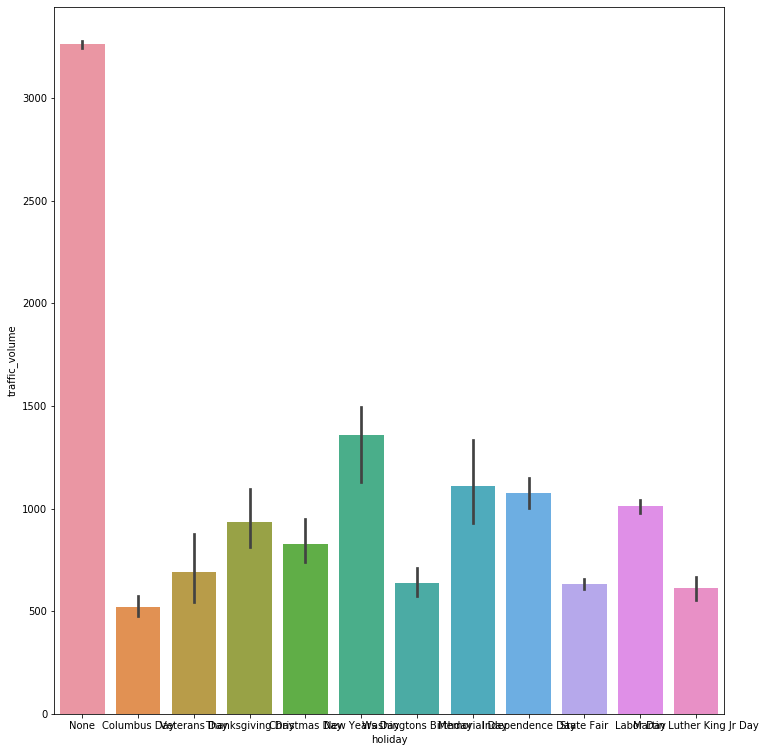

In [38]:
plt.figure(figsize=(12,13))
sns.barplot(x='holiday', y='traffic_volume', data = new_data)
plt.show()

From the distribution we can see that on a Holiday traffic volume is less and on Non-holiday traffic is more. So we can make two division as Holiday and Non-Holiday, and using this we would encode our dataset.

In [39]:
#Other holidays are very sparse compared to none holidays. 
#Hence encoding the holidays as TRUE or 1 and none Holidays as FALSE or Zero

def modify_holiday(x):
    if x == 'None':
        return 0
    else:
        return 1
    
#applying the above function on the holiday column    
new_data['holiday'] = new_data['holiday'].map(modify_holiday)


In [40]:
new_data.head()

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0        0  288.28      0.0      0.0          40       Clouds   
1        0  289.36      0.0      0.0          75       Clouds   
2        0  289.58      0.0      0.0          90       Clouds   
3        0  290.13      0.0      0.0          90       Clouds   
4        0  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918

In [41]:
new_data.tail()

holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199        0  283.45      0.0      0.0          75        Clouds   
48200        0  282.76      0.0      0.0          90        Clouds   
48201        0  282.73      0.0      0.0          90  Thunderstorm   
48202        0  282.09      0.0      0.0          90        Clouds   
48203        0  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
48199           broken clouds  2018-09-30 19:00:00            3543  
48200         overcast clouds  2018-09-30 20:00:00            2781  
48201  proximity thunderstorm  2018-09-30 21:00:00            2159  
48202         overcast clouds  2018-09-30 22:00:00            1450  
48203         overcast clouds  2018-09-30 23:00:00             954

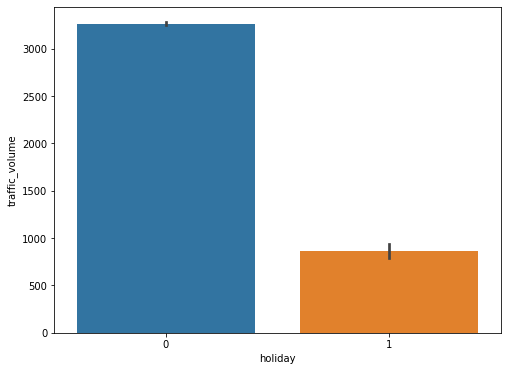

In [42]:
#Traffic volume difference during holiday and non holiday
plt.figure(figsize=(8,6))
sns.barplot(x='holiday', y='traffic_volume', data = new_data)
plt.show()


Here 0 = Non-Holiday and 1 = Holiday, we can understand that average traffic volume is always high on non-holidays.

Now we will look into the weather_main categorical column of the dataset.

In [44]:
new_data['weather_main'].unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object)

So, there 11 different(unique) categorical values in this columns

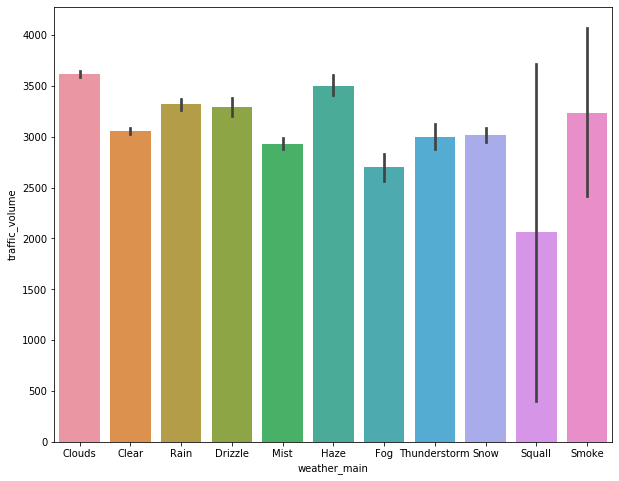

In [45]:
#Plotting weather_main over traffic volume
plt.figure(figsize=(10,8))
sns.barplot(x='weather_main', y = 'traffic_volume', data = new_data)
plt.show()

From the above barplot we don't see any unevenness in data distribution among different weather type.

In [46]:
new_data['weather_main'].value_counts()

Clouds          15164
Clear           13391
Mist             5950
Rain             5671
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64

In [47]:
new_data[new_data['weather_main']=='Fog'].describe()

holiday        temp     rain_1h     snow_1h  clouds_all  traffic_volume
count    912.0  912.000000  912.000000  912.000000  912.000000      912.000000
mean       0.0  279.415713    0.087007    0.000625   51.497807     2703.720395
std        0.0    9.327352    0.724790    0.017002   40.967176     2125.525863
min        0.0  246.740000    0.000000    0.000000    0.000000       10.000000
25%        0.0  272.410000    0.000000    0.000000    1.000000      677.500000
50%        0.0  276.615000    0.000000    0.000000   75.000000     2339.000000
75%        0.0  288.612500    0.000000    0.000000   90.000000     4730.750000
max        0.0  296.520000   13.460000    0.510000   93.000000     7067.000000

In [48]:
new_data[new_data['weather_main']=='Smoke'].describe()

holiday        temp   rain_1h  snow_1h  clouds_all  traffic_volume
count     20.0   20.000000  20.00000     20.0   20.000000       20.000000
mean       0.0  290.927500   0.52700      0.0   53.350000     3237.650000
std        0.0    4.753122   1.56815      0.0   35.610872     1978.015893
min        0.0  283.290000   0.00000      0.0    1.000000      367.000000
25%        0.0  287.112500   0.00000      0.0   30.250000     1232.750000
50%        0.0  291.215000   0.00000      0.0   75.000000     3612.000000
75%        0.0  294.255000   0.00000      0.0   78.750000     4558.000000
max        0.0  300.140000   5.59000      0.0   92.000000     6006.000000

In [49]:
new_data[new_data['weather_main']=='Squall'].describe()

holiday        temp   rain_1h  snow_1h  clouds_all  traffic_volume
count      4.0    4.000000  4.000000      4.0    4.000000         4.00000
mean       0.0  292.387500  3.482500      0.0   76.000000      2061.75000
std        0.0    5.562723  3.480119      0.0   10.677078      1950.07049
min        0.0  284.280000  0.000000      0.0   64.000000       400.00000
25%        0.0  291.202500  0.765000      0.0   72.250000       415.00000
50%        0.0  294.270000  3.495000      0.0   75.000000      1818.00000
75%        0.0  295.455000  6.212500      0.0   78.750000      3464.75000
max        0.0  296.730000  6.940000      0.0   90.000000      4211.00000

Since there are very less data points with weather as 'Fog','Smoke','Squall' we are trying to combine them as one, by making it in one group and then check the performance of the model.

In [47]:
#Combining 'Fog','Smoke' and 'Squall'

#def modify_weather(x):
 #   if (x == 'Fog') or (x == 'Smoke') or (x == 'Squall'):
  #      return 'Others'
  #  else:
   #     return x
    
#applying the above function on the weather_main column    
#new_data['weather_main'] = new_data['weather_main'].map(modify_weather)


In [48]:
#new_data['weather_main'].value_counts()

Perform One-hot encoding for 'weather_main' column

Now we will see the weather_describtion column, this column has lot ot unique values , we first need to determine whether this column is important to our dateset or not.

In [50]:
new_data['weather_description'].unique()

array(['scattered clouds', 'broken clouds', 'overcast clouds',
       'sky is clear', 'few clouds', 'light rain',
       'light intensity drizzle', 'mist', 'haze', 'fog',
       'proximity shower rain', 'drizzle', 'moderate rain',
       'heavy intensity rain', 'proximity thunderstorm',
       'thunderstorm with light rain', 'proximity thunderstorm with rain',
       'heavy snow', 'heavy intensity drizzle', 'snow',
       'thunderstorm with heavy rain', 'freezing rain', 'shower snow',
       'light rain and snow', 'light intensity shower rain', 'SQUALLS',
       'thunderstorm with rain', 'proximity thunderstorm with drizzle',
       'thunderstorm', 'Sky is Clear', 'very heavy rain',
       'thunderstorm with light drizzle', 'light snow',
       'thunderstorm with drizzle', 'smoke', 'shower drizzle',
       'light shower snow', 'sleet'], dtype=object)

In [51]:
new_data['weather_description'].value_counts()

sky is clear                           11665
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
Sky is Clear                            1726
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             125
heavy intensity drizzle                   64
thunderstorm with heavy rain              63
thundersto

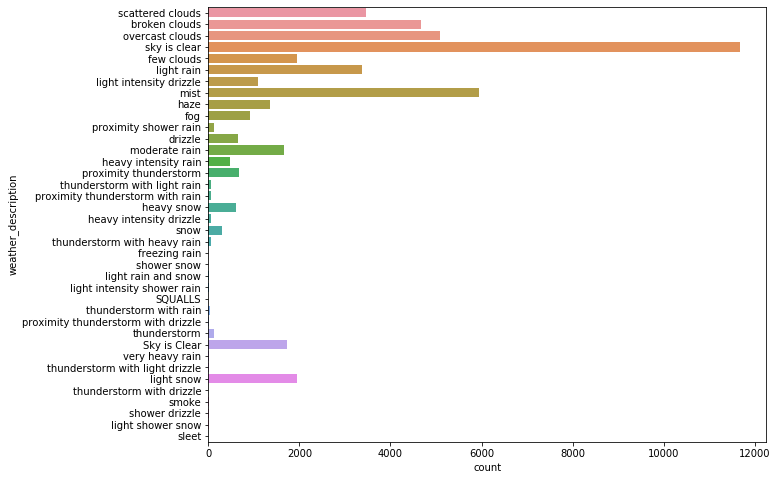

In [52]:
#exploring different categories in weather_description
plt.figure(figsize=(10,8))
sns.countplot(y='weather_description', data=new_data)
plt.show()

from the above countplot & the value_count() function it is clear there are many weather_description type which does have adequate data.

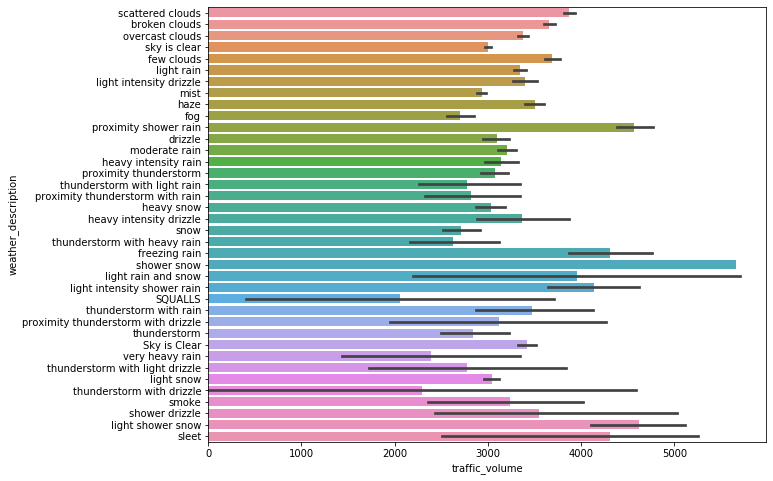

In [53]:
#Plotting weather_description over traffic volume
plt.figure(figsize=(10,8))
sns.barplot(y='weather_description', x = 'traffic_volume', data = new_data)
plt.show()

In [54]:
#converting to lower case
new_data['weather_description'].replace('Sky is Clear','sky is clear',inplace=True) # Not of much use

In [55]:
new_data[new_data['weather_description']=='proximity thunderstorm'].describe()

holiday        temp     rain_1h  snow_1h  clouds_all  traffic_volume
count  673.000000  673.000000  673.000000    673.0  673.000000      673.000000
mean     0.001486  293.020743    1.072897      0.0   66.121842     3076.457652
std      0.038547    5.690581    2.985085      0.0   32.064945     1971.315533
min      0.000000  260.540000    0.000000      0.0    0.000000        3.000000
25%      0.000000  290.180000    0.000000      0.0   40.000000      958.000000
50%      0.000000  293.690000    0.000000      0.0   75.000000     3064.000000
75%      0.000000  296.510000    0.300000      0.0   90.000000     4756.000000
max      1.000000  307.870000   27.570000      0.0  100.000000     6871.000000

In [56]:
new_data[new_data['weather_description']=='thunderstorm'].describe()

holiday        temp     rain_1h  snow_1h  clouds_all  traffic_volume
count    125.0  125.000000  125.000000    125.0  125.000000      125.000000
mean       0.0  293.831440    1.121440      0.0   66.896000     2843.752000
std        0.0    4.717589    2.935004      0.0   30.593543     2059.815842
min        0.0  276.720000    0.000000      0.0    0.000000        3.000000
25%        0.0  290.990000    0.000000      0.0   40.000000      709.000000
50%        0.0  294.020000    0.000000      0.0   75.000000     2616.000000
75%        0.0  296.790000    1.020000      0.0   90.000000     4541.000000
max        0.0  305.620000   25.460000      0.0   92.000000     6414.000000

In [62]:
new_data[new_data['traffic_volume']==new_data['traffic_volume'].min()]

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
25186        0  296.68      0.0      0.0          40         Rain   
25191        0  295.90      0.0      0.0          90         Haze   

      weather_description            date_time  traffic_volume  
25186          light rain  2016-07-23 18:00:00               0  
25191                haze  2016-07-23 23:00:00               0

In [63]:
#looking at different types of rain below

In [57]:
new_data[new_data['weather_main']=='Rain'][['weather_description','weather_main','traffic_volume']].head(20)

weather_description weather_main  traffic_volume
164             light rain         Rain            5777
178             light rain         Rain            6793
180             light rain         Rain            6283
182             light rain         Rain            5680
220             light rain         Rain             739
277             light rain         Rain            4076
279             light rain         Rain            4128
283             light rain         Rain            4358
286             light rain         Rain            4342
288             light rain         Rain            4271
344             light rain         Rain            3311
358  proximity shower rain         Rain            5403
359             light rain         Rain            5403
383             light rain         Rain            5256
386             light rain         Rain            5147
394             light rain         Rain            2921
405             light rain         Rain             720
408             light rain         Rain            2370
411             light rain         Rain            5162
413          moderate rain         Rain            5777

In [58]:
new_data[new_data['weather_description']=='moderate rain'].describe()

holiday         temp      rain_1h      snow_1h   clouds_all  \
count  1664.000000  1664.000000  1664.000000  1664.000000  1664.000000   
mean      0.000601   286.918244     0.577843     0.000499    77.969952   
std       0.024515     7.378690     0.904531     0.014756    25.046877   
min       0.000000   259.970000     0.000000     0.000000     0.000000   
25%       0.000000   280.557500     0.000000     0.000000    75.000000   
50%       0.000000   288.525000     0.000000     0.000000    90.000000   
75%       0.000000   292.582500     1.032500     0.000000    90.000000   
max       1.000000   303.250000     3.980000     0.510000   100.000000   

       traffic_volume  
count     1664.000000  
mean      3202.603966  
std       1987.389675  
min          3.000000  
25%       1104.500000  
50%       3199.000000  
75%       4891.750000  
max       7260.000000

In [59]:
new_data[new_data['weather_description']=='heavy intensity rain'].describe()

holiday        temp     rain_1h  snow_1h  clouds_all  traffic_volume
count    467.0  467.000000  467.000000    467.0  467.000000      467.000000
mean       0.0  290.326981    2.656660      0.0   79.351178     3140.072805
std        0.0    5.401111    3.582115      0.0   23.227297     1997.798073
min        0.0  264.530000    0.000000      0.0    0.000000        2.000000
25%        0.0  287.815000    0.000000      0.0   75.000000      941.000000
50%        0.0  291.240000    0.250000      0.0   90.000000     3201.000000
75%        0.0  294.075000    5.050000      0.0   90.000000     4877.500000
max        0.0  302.960000   16.000000      0.0  100.000000     6844.000000

In [60]:
new_data[new_data['weather_description']=='light rain'].describe()

holiday         temp      rain_1h      snow_1h   clouds_all  \
count  3372.000000  3372.000000  3372.000000  3372.000000  3372.000000   
mean      0.001186   286.335152     0.129404     0.000068    68.860913   
std       0.034427     8.533915     0.211738     0.003104    31.878309   
min       0.000000   255.810000     0.000000     0.000000     0.000000   
25%       0.000000   278.947500     0.000000     0.000000    48.000000   
50%       0.000000   287.825000     0.000000     0.000000    90.000000   
75%       0.000000   293.095000     0.250000     0.000000    90.000000   
max       1.000000   304.010000     1.000000     0.170000   100.000000   

       traffic_volume  
count     3372.000000  
mean      3349.257117  
std       1986.746943  
min          0.000000  
25%       1357.000000  
50%       3590.500000  
75%       4993.250000  
max       7149.000000

In [61]:
new_data[new_data['weather_main']=='Rain'].describe()

holiday         temp      rain_1h      snow_1h   clouds_all  \
count  5671.000000  5671.000000  5671.000000  5671.000000  5671.000000   
mean      0.000882   286.976918     0.547849     0.000187    72.599365   
std       0.029683     8.054219     1.995705     0.008344    29.490141   
min       0.000000   255.810000     0.000000     0.000000     0.000000   
25%       0.000000   280.435000     0.000000     0.000000    75.000000   
50%       0.000000   288.800000     0.000000     0.000000    90.000000   
75%       0.000000   293.150000     0.250000     0.000000    90.000000   
max       1.000000   304.720000    55.630000     0.510000   100.000000   

       traffic_volume  
count     5671.000000  
mean      3317.514548  
std       1982.184789  
min          0.000000  
25%       1312.500000  
50%       3497.000000  
75%       4965.000000  
max       7260.000000

whether it is 'moderate rain','light rain' , 'heavy intensity rain', we can find there is not much different in the traffice volume. Also for other values this same distribution is present. I think this particular column **'weather_description'** is only for our better understanding of data. So we will drop this column (or not use it as a feature column for our prediction) from our existing dataset and try to predict.

Working with the date_time column

In [62]:
#Extracting features from date_time variable
#first changing the 'date_time' column to 'datetime' type
new_data['date_time'] = pd.to_datetime(df.date_time)

In [63]:
new_data.head()

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0        0  288.28      0.0      0.0          40       Clouds   
1        0  289.36      0.0      0.0          75       Clouds   
2        0  289.58      0.0      0.0          90       Clouds   
3        0  290.13      0.0      0.0          90       Clouds   
4        0  291.14      0.0      0.0          75       Clouds   

  weather_description           date_time  traffic_volume  
0    scattered clouds 2012-10-02 09:00:00            5545  
1       broken clouds 2012-10-02 10:00:00            4516  
2     overcast clouds 2012-10-02 11:00:00            4767  
3     overcast clouds 2012-10-02 12:00:00            5026  
4       broken clouds 2012-10-02 13:00:00            4918

In [64]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48203 entries, 0 to 48203
Data columns (total 9 columns):
holiday                48203 non-null int64
temp                   48203 non-null float64
rain_1h                48203 non-null float64
snow_1h                48203 non-null float64
clouds_all             48203 non-null int64
weather_main           48203 non-null object
weather_description    48203 non-null object
date_time              48203 non-null datetime64[ns]
traffic_volume         48203 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 4.9+ MB


In [65]:
#extracting data 
new_data['weekday'] = new_data.date_time.dt.weekday
new_data['date'] = new_data.date_time.dt.date
new_data['hour'] = new_data.date_time.dt.hour
new_data['month'] = new_data.date_time.dt.month
new_data['year'] = new_data.date_time.dt.year

In [66]:
##Monday is 0 and Sunday is 6
new_data.head()

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0        0  288.28      0.0      0.0          40       Clouds   
1        0  289.36      0.0      0.0          75       Clouds   
2        0  289.58      0.0      0.0          90       Clouds   
3        0  290.13      0.0      0.0          90       Clouds   
4        0  291.14      0.0      0.0          75       Clouds   

  weather_description           date_time  traffic_volume  weekday  \
0    scattered clouds 2012-10-02 09:00:00            5545        1   
1       broken clouds 2012-10-02 10:00:00            4516        1   
2     overcast clouds 2012-10-02 11:00:00            4767        1   
3     overcast clouds 2012-10-02 12:00:00            5026        1   
4       broken clouds 2012-10-02 13:00:00            4918        1   

         date  hour  month  year  
0  2012-10-02     9     10  2012  
1  2012-10-02    10     10  2012  
2  2012-10-02    11     10  2012  
3  2012-10-02    12     10  2012  
4  2012-10-02    13     10  2012

In [67]:
new_data.shape

(48203, 14)

In [68]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48203 entries, 0 to 48203
Data columns (total 14 columns):
holiday                48203 non-null int64
temp                   48203 non-null float64
rain_1h                48203 non-null float64
snow_1h                48203 non-null float64
clouds_all             48203 non-null int64
weather_main           48203 non-null object
weather_description    48203 non-null object
date_time              48203 non-null datetime64[ns]
traffic_volume         48203 non-null int64
weekday                48203 non-null int64
date                   48203 non-null object
hour                   48203 non-null int64
month                  48203 non-null int64
year                   48203 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(7), object(3)
memory usage: 6.8+ MB


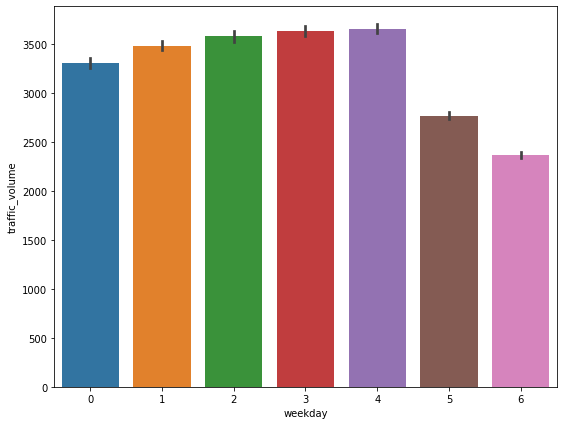

In [69]:
#Plotting weekday over traffic volume
plt.figure(figsize=(9,7))
sns.barplot(x='weekday', y = 'traffic_volume', data = new_data)
plt.show()

From the above graph it is visible that the traffic volume on Sunday(Monday is 0 and Sunday is 6) is a bit less than other days.

Now we will set the date_time column as our index of the data. 

In [77]:
#weather_main_new_df.info()

In [78]:
#weather_main_new_df.isna().sum()

In [79]:
#new_data = pd.concat([new_data,weather_main_new_df],axis=1)
#new_data.sample(4)

In [80]:
#new_data.info()

In [81]:
#new_data.drop(['weather_main','weather_description'],axis=1,inplace=True)

In [70]:
#setting date_time as Index
#also creating a final dataset which we will save for future use
final_data = new_data.set_index('date_time')
final_data.head()

holiday    temp  rain_1h  snow_1h  clouds_all  \
date_time                                                            
2012-10-02 09:00:00        0  288.28      0.0      0.0          40   
2012-10-02 10:00:00        0  289.36      0.0      0.0          75   
2012-10-02 11:00:00        0  289.58      0.0      0.0          90   
2012-10-02 12:00:00        0  290.13      0.0      0.0          90   
2012-10-02 13:00:00        0  291.14      0.0      0.0          75   

                    weather_main weather_description  traffic_volume  weekday  \
date_time                                                                       
2012-10-02 09:00:00       Clouds    scattered clouds            5545        1   
2012-10-02 10:00:00       Clouds       broken clouds            4516        1   
2012-10-02 11:00:00       Clouds     overcast clouds            4767        1   
2012-10-02 12:00:00       Clouds     overcast clouds            5026        1   
2012-10-02 13:00:00       Clouds       broken clouds            4918        1   

                           date  hour  month  year  
date_time                                           
2012-10-02 09:00:00  2012-10-02     9     10  2012  
2012-10-02 10:00:00  2012-10-02    10     10  2012  
2012-10-02 11:00:00  2012-10-02    11     10  2012  
2012-10-02 12:00:00  2012-10-02    12     10  2012  
2012-10-02 13:00:00  2012-10-02    13     10  2012

In [71]:
final_data.tail()

holiday    temp  rain_1h  snow_1h  clouds_all  \
date_time                                                            
2018-09-30 19:00:00        0  283.45      0.0      0.0          75   
2018-09-30 20:00:00        0  282.76      0.0      0.0          90   
2018-09-30 21:00:00        0  282.73      0.0      0.0          90   
2018-09-30 22:00:00        0  282.09      0.0      0.0          90   
2018-09-30 23:00:00        0  282.12      0.0      0.0          90   

                     weather_main     weather_description  traffic_volume  \
date_time                                                                   
2018-09-30 19:00:00        Clouds           broken clouds            3543   
2018-09-30 20:00:00        Clouds         overcast clouds            2781   
2018-09-30 21:00:00  Thunderstorm  proximity thunderstorm            2159   
2018-09-30 22:00:00        Clouds         overcast clouds            1450   
2018-09-30 23:00:00        Clouds         overcast clouds             954   

                     weekday        date  hour  month  year  
date_time                                                    
2018-09-30 19:00:00        6  2018-09-30    19      9  2018  
2018-09-30 20:00:00        6  2018-09-30    20      9  2018  
2018-09-30 21:00:00        6  2018-09-30    21      9  2018  
2018-09-30 22:00:00        6  2018-09-30    22      9  2018  
2018-09-30 23:00:00        6  2018-09-30    23      9  2018

In [72]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48203 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 13 columns):
holiday                48203 non-null int64
temp                   48203 non-null float64
rain_1h                48203 non-null float64
snow_1h                48203 non-null float64
clouds_all             48203 non-null int64
weather_main           48203 non-null object
weather_description    48203 non-null object
traffic_volume         48203 non-null int64
weekday                48203 non-null int64
date                   48203 non-null object
hour                   48203 non-null int64
month                  48203 non-null int64
year                   48203 non-null int64
dtypes: float64(3), int64(7), object(3)
memory usage: 5.1+ MB


In [73]:
final_data[:'2016-12-31'].sample(5)

holiday    temp  rain_1h  snow_1h  clouds_all  \
date_time                                                            
2016-05-11 08:00:00        0  283.22      0.0      0.0          90   
2014-04-22 07:00:00        0  276.12      0.0      0.0          20   
2013-01-31 06:00:00        0  267.15      0.0      0.0          90   
2015-07-09 22:00:00        0  293.76      0.0      0.0           1   
2016-06-12 06:00:00        0  289.94      0.0      0.0          36   

                    weather_main weather_description  traffic_volume  weekday  \
date_time                                                                       
2016-05-11 08:00:00         Rain          light rain            6087        2   
2014-04-22 07:00:00       Clouds          few clouds            6816        1   
2013-01-31 06:00:00       Clouds     overcast clouds            5348        3   
2015-07-09 22:00:00         Haze                haze            2578        3   
2016-06-12 06:00:00       Clouds    scattered clouds             810        6   

                           date  hour  month  year  
date_time                                           
2016-05-11 08:00:00  2016-05-11     8      5  2016  
2014-04-22 07:00:00  2014-04-22     7      4  2014  
2013-01-31 06:00:00  2013-01-31     6      1  2013  
2015-07-09 22:00:00  2015-07-09    22      7  2015  
2016-06-12 06:00:00  2016-06-12     6      6  2016

**Separated data**

In [74]:
X = final_data[['holiday','temp','rain_1h','snow_1h','clouds_all','weather_main','weekday','hour','month','year']]
y = final_data['traffic_volume']

In [75]:
X.shape

(48203, 10)

In [76]:
X.head()

holiday    temp  rain_1h  snow_1h  clouds_all  \
date_time                                                            
2012-10-02 09:00:00        0  288.28      0.0      0.0          40   
2012-10-02 10:00:00        0  289.36      0.0      0.0          75   
2012-10-02 11:00:00        0  289.58      0.0      0.0          90   
2012-10-02 12:00:00        0  290.13      0.0      0.0          90   
2012-10-02 13:00:00        0  291.14      0.0      0.0          75   

                    weather_main  weekday  hour  month  year  
date_time                                                     
2012-10-02 09:00:00       Clouds        1     9     10  2012  
2012-10-02 10:00:00       Clouds        1    10     10  2012  
2012-10-02 11:00:00       Clouds        1    11     10  2012  
2012-10-02 12:00:00       Clouds        1    12     10  2012  
2012-10-02 13:00:00       Clouds        1    13     10  2012

In [77]:
y.head()

date_time
2012-10-02 09:00:00    5545
2012-10-02 10:00:00    4516
2012-10-02 11:00:00    4767
2012-10-02 12:00:00    5026
2012-10-02 13:00:00    4918
Name: traffic_volume, dtype: int64

In [78]:
#one-hot encoding for weather main

weather_main = pd.get_dummies(X['weather_main'],prefix='weather',drop_first=True)
weather_main.head()

weather_Clouds  weather_Drizzle  weather_Fog  \
date_time                                                           
2012-10-02 09:00:00               1                0            0   
2012-10-02 10:00:00               1                0            0   
2012-10-02 11:00:00               1                0            0   
2012-10-02 12:00:00               1                0            0   
2012-10-02 13:00:00               1                0            0   

                     weather_Haze  weather_Mist  weather_Rain  weather_Smoke  \
date_time                                                                      
2012-10-02 09:00:00             0             0             0              0   
2012-10-02 10:00:00             0             0             0              0   
2012-10-02 11:00:00             0             0             0              0   
2012-10-02 12:00:00             0             0             0              0   
2012-10-02 13:00:00             0             0             0              0   

                     weather_Snow  weather_Squall  weather_Thunderstorm  
date_time                                                                
2012-10-02 09:00:00             0               0                     0  
2012-10-02 10:00:00             0               0                     0  
2012-10-02 11:00:00             0               0                     0  
2012-10-02 12:00:00             0               0                     0  
2012-10-02 13:00:00             0               0                     0

In [79]:
#concating the encoded dataset with the existing X values
X_encoded = pd.concat([X,weather_main],axis=1)
X_encoded.head()

holiday    temp  rain_1h  snow_1h  clouds_all  \
date_time                                                            
2012-10-02 09:00:00        0  288.28      0.0      0.0          40   
2012-10-02 10:00:00        0  289.36      0.0      0.0          75   
2012-10-02 11:00:00        0  289.58      0.0      0.0          90   
2012-10-02 12:00:00        0  290.13      0.0      0.0          90   
2012-10-02 13:00:00        0  291.14      0.0      0.0          75   

                    weather_main  weekday  hour  month  year  weather_Clouds  \
date_time                                                                      
2012-10-02 09:00:00       Clouds        1     9     10  2012               1   
2012-10-02 10:00:00       Clouds        1    10     10  2012               1   
2012-10-02 11:00:00       Clouds        1    11     10  2012               1   
2012-10-02 12:00:00       Clouds        1    12     10  2012               1   
2012-10-02 13:00:00       Clouds        1    13     10  2012               1   

                     weather_Drizzle  weather_Fog  weather_Haze  weather_Mist  \
date_time                                                                       
2012-10-02 09:00:00                0            0             0             0   
2012-10-02 10:00:00                0            0             0             0   
2012-10-02 11:00:00                0            0             0             0   
2012-10-02 12:00:00                0            0             0             0   
2012-10-02 13:00:00                0            0             0             0   

                     weather_Rain  weather_Smoke  weather_Snow  \
date_time                                                        
2012-10-02 09:00:00             0              0             0   
2012-10-02 10:00:00             0              0             0   
2012-10-02 11:00:00             0              0             0   
2012-10-02 12:00:00             0              0             0   
2012-10-02 13:00:00             0              0             0   

                     weather_Squall  weather_Thunderstorm  
date_time                                                  
2012-10-02 09:00:00               0                     0  
2012-10-02 10:00:00               0                     0  
2012-10-02 11:00:00               0                     0  
2012-10-02 12:00:00               0                     0  
2012-10-02 13:00:00               0                     0

In [80]:
# Dropping the categorical column
X_encoded.drop(['weather_main'],axis=1,inplace=True)
#final 'X' dataset for prediction 
X_encoded.tail()

holiday    temp  rain_1h  snow_1h  clouds_all  weekday  \
date_time                                                                     
2018-09-30 19:00:00        0  283.45      0.0      0.0          75        6   
2018-09-30 20:00:00        0  282.76      0.0      0.0          90        6   
2018-09-30 21:00:00        0  282.73      0.0      0.0          90        6   
2018-09-30 22:00:00        0  282.09      0.0      0.0          90        6   
2018-09-30 23:00:00        0  282.12      0.0      0.0          90        6   

                     hour  month  year  weather_Clouds  weather_Drizzle  \
date_time                                                                 
2018-09-30 19:00:00    19      9  2018               1                0   
2018-09-30 20:00:00    20      9  2018               1                0   
2018-09-30 21:00:00    21      9  2018               0                0   
2018-09-30 22:00:00    22      9  2018               1                0   
2018-09-30 23:00:00    23      9  2018               1                0   

                     weather_Fog  weather_Haze  weather_Mist  weather_Rain  \
date_time                                                                    
2018-09-30 19:00:00            0             0             0             0   
2018-09-30 20:00:00            0             0             0             0   
2018-09-30 21:00:00            0             0             0             0   
2018-09-30 22:00:00            0             0             0             0   
2018-09-30 23:00:00            0             0             0             0   

                     weather_Smoke  weather_Snow  weather_Squall  \
date_time                                                          
2018-09-30 19:00:00              0             0               0   
2018-09-30 20:00:00              0             0               0   
2018-09-30 21:00:00              0             0               0   
2018-09-30 22:00:00              0             0               0   
2018-09-30 23:00:00              0             0               0   

                     weather_Thunderstorm  
date_time                                  
2018-09-30 19:00:00                     0  
2018-09-30 20:00:00                     0  
2018-09-30 21:00:00                     1  
2018-09-30 22:00:00                     0  
2018-09-30 23:00:00                     0

In [81]:
X_encoded.shape

(48203, 19)

In [102]:
X_encoded.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weekday',
       'hour', 'month', 'year', 'weather_Clouds', 'weather_Drizzle',
       'weather_Fog', 'weather_Haze', 'weather_Mist', 'weather_Rain',
       'weather_Smoke', 'weather_Snow', 'weather_Squall',
       'weather_Thunderstorm'],
      dtype='object')

In [82]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48203 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 19 columns):
holiday                 48203 non-null int64
temp                    48203 non-null float64
rain_1h                 48203 non-null float64
snow_1h                 48203 non-null float64
clouds_all              48203 non-null int64
weekday                 48203 non-null int64
hour                    48203 non-null int64
month                   48203 non-null int64
year                    48203 non-null int64
weather_Clouds          48203 non-null uint8
weather_Drizzle         48203 non-null uint8
weather_Fog             48203 non-null uint8
weather_Haze            48203 non-null uint8
weather_Mist            48203 non-null uint8
weather_Rain            48203 non-null uint8
weather_Smoke           48203 non-null uint8
weather_Snow            48203 non-null uint8
weather_Squall          48203 non-null uint8
weather_Thunderstorm    48203 non-null u

-----------------**----------------------**

Now since this is a time based data, we would first create our train set on the older data then test our model performance on the test data which would be the newer or latest data to understand the performance of our model.

Here the data is from 2nd October,2012 to 30th Sept,2018. We are taking our train set data till 31st december 2016, rest will our test data.

Also before dividing our main dataset into train and test, it is better to save this encoded data for future reference. So, we will save this dataset as a .csv file in the same path of our working folder.

In [98]:
#saving the data in the below file
#final_data.to_csv('Metro_Interstate_Traffic_Volume_Encoded_ver1.csv',header=True)

## Train-test split

In [83]:
X_train = X_encoded[:'2016-12-31']

X_test = X_encoded['2017-01-01':]

y_train = y[:'2016-12-31']

y_test = y['2017-01-01':]

In [84]:
X_train.head()

holiday    temp  rain_1h  snow_1h  clouds_all  weekday  \
date_time                                                                     
2012-10-02 09:00:00        0  288.28      0.0      0.0          40        1   
2012-10-02 10:00:00        0  289.36      0.0      0.0          75        1   
2012-10-02 11:00:00        0  289.58      0.0      0.0          90        1   
2012-10-02 12:00:00        0  290.13      0.0      0.0          90        1   
2012-10-02 13:00:00        0  291.14      0.0      0.0          75        1   

                     hour  month  year  weather_Clouds  weather_Drizzle  \
date_time                                                                 
2012-10-02 09:00:00     9     10  2012               1                0   
2012-10-02 10:00:00    10     10  2012               1                0   
2012-10-02 11:00:00    11     10  2012               1                0   
2012-10-02 12:00:00    12     10  2012               1                0   
2012-10-02 13:00:00    13     10  2012               1                0   

                     weather_Fog  weather_Haze  weather_Mist  weather_Rain  \
date_time                                                                    
2012-10-02 09:00:00            0             0             0             0   
2012-10-02 10:00:00            0             0             0             0   
2012-10-02 11:00:00            0             0             0             0   
2012-10-02 12:00:00            0             0             0             0   
2012-10-02 13:00:00            0             0             0             0   

                     weather_Smoke  weather_Snow  weather_Squall  \
date_time                                                          
2012-10-02 09:00:00              0             0               0   
2012-10-02 10:00:00              0             0               0   
2012-10-02 11:00:00              0             0               0   
2012-10-02 12:00:00              0             0               0   
2012-10-02 13:00:00              0             0               0   

                     weather_Thunderstorm  
date_time                                  
2012-10-02 09:00:00                     0  
2012-10-02 10:00:00                     0  
2012-10-02 11:00:00                     0  
2012-10-02 12:00:00                     0  
2012-10-02 13:00:00                     0

In [85]:
y_train.head()

date_time
2012-10-02 09:00:00    5545
2012-10-02 10:00:00    4516
2012-10-02 11:00:00    4767
2012-10-02 12:00:00    5026
2012-10-02 13:00:00    4918
Name: traffic_volume, dtype: int64

In [86]:
y_test.tail()

date_time
2018-09-30 19:00:00    3543
2018-09-30 20:00:00    2781
2018-09-30 21:00:00    2159
2018-09-30 22:00:00    1450
2018-09-30 23:00:00     954
Name: traffic_volume, dtype: int64

In [87]:
X_train.shape

(29649, 19)

In [104]:
#X_test.head()

In [105]:
#y_test.head()

## Model Building

Random_forest

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
random_forest_model = RandomForestRegressor(random_state=10)

In [90]:
#First i'm fitting our data to the model without applying any scaling

random_forest_model.fit(X_train,y_train)

RandomForestRegressor(random_state=10)

In [91]:
random_forest_model.score(X_train,y_train)

0.992967457695228

In [92]:
random_forest_model.score(X_test,y_test)

0.9294874927722675

In [93]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [94]:
#trying to do some hyper-parameter tuning with the existing model
grid_param = {
    "n_estimators" : [100,200,300,400],
    "max_depth" : [5,10,15,20],
    "min_samples_leaf" : [1, 2, 5],
    'max_features' : ['auto', 'sqrt']
}

In [95]:
grid_search = GridSearchCV(estimator=random_forest_model,param_grid=grid_param,verbose=7,cv=3,n_jobs=-1)


In [96]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed: 16.3min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=10), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 5],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=7)

In [97]:
#getting the best parameters
grid_search.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'n_estimators': 400}

In [99]:
grid_search.best_score_

0.9246373851468106

In [98]:
random_forest_model = RandomForestRegressor(max_depth=10,n_estimators=400,min_samples_leaf=5,max_features='auto',random_state=10)

In [100]:
random_forest_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=5, n_estimators=400,
                      random_state=10)

In [101]:
#hypertuned model score
random_forest_model.score(X_test,y_test)

0.9393686226297572

**XGBoost**

In [103]:
boosting_model = XGBRegressor(random_state =  6)

In [104]:
boosting_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=6,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [105]:
boosting_model.score(X_test,y_test)

0.9330016794294209

In [106]:
# parameters for randomized search CV
random_grid = {
  #  'booster' : ['gbtree','gblinear'],
    'learning_rate' : [1,0.5,0.3,0.1,0.01],
    'max_depth': [5,10,20,40],
    'n_estimators':[50,100,150,200]
}

In [107]:
random_search = RandomizedSearchCV(estimator=boosting_model,param_distributions=random_grid,n_iter=50,cv=3,verbose=5,n_jobs=-1)

In [108]:
random_search.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 17.6min finished


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=0,
                                          num_parallel_tree=1, random_state=6,
                                          reg_alpha=0, reg_lambda=1,
                                          scale_pos_

In [109]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [ ]:
random_search.best_score_

In [110]:
boosting_model = XGBRegressor(n_estimators= 50, max_depth= 5, learning_rate= 0.1,random_state =  6)

In [111]:
boosting_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=6,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [112]:
boosting_model.score(X_test,y_test)

0.9364456413183132